# Modeling a Single Tank
Eventually, we want to design a model to predict the how nutrient concentrations will evolve in a system of four tanks coupled to each other. Let's start with a simpler example to see how to program this model and implement it in python. Imagine a single tank, with one input and one output. To keep things simple, we will assume the volumetric flow rate in and out are equal, so the tank volume doesn't change. But we're not really interested in the volume; we're interested in the concentration of dissolved phosphate in the tank. Assuming we know what the concentration is at some moment, we want to predict how it is changing. Let's call the concentration in the tank $c$, and the rate at which it is changing: $c'.$ If we can design an expression which solves $c'$ for any input $c$, we can predict the evolution of the system over time. This ability to transform information about rates at a single moment into states way into the future is the realm of differential equations, an extremely important application of calculus in science. Here's what that transformation looks like mathematically:

$$c'=f(c)\longrightarrow c = g(t)$$

Again, the point of performing this transformation is that ultimately we want to be able to choose some time $t$ in the future and predict $c$. But we have to start with the information at hand, and the best we can do there is to express $c'$ in terms of $c$. Now, let's begin actually designing our system.  Finding an expression for $c'=f(c)$ turns out to be a bit harder than it looks, since $c$ is a ratio of moles (amount) to volume. It will be easier to start with simply asking how much nutrient (in moles) is in our tank, and how much is that amount changing? You should convince yourself that the amount of nutrient in a tank is the concentration (moles/L) times the volume (L). So let's express volume as $v$ and start our equation with the term $vc'$ instead of $c'$. And how is $vc$ changing; that is, what is $vc'$? We will have to consider the balance of nutrient entering and exiting the tank. Now again, we can't just consider the concentration of solution flowing in and out, we have to consider each amount flux (mol/hr) as a product of volumetric flow rate (L/hr) and concentration (mol/L). The inflow serves to increase the amount of nutrient in the tank, and the outflow decreases the amount:

$$vc'=q_\text{in}c_\text{in} - q_\text{out}c_\text{out}.$$

That's really the heart of our model! There are a few adjustments we will want to make before we generalize this to our full system of four tanks. First, we should recognize that the concentration of water flowing out of the tank $(c_\text{out})$ should be equal to the concentration in the tank itself $(c)$. Similarly, if we were to imagine the inflow coming from some other tank, $c_\text{in}$ would be equal to the concentration of _that_ tank. And second, we will divide both sides of the equation by $v$ to solve for $c'$ as we were hoping for:

$$\boxed{c'=f(c) = (q_\text{in}c_\text{in} - q_\text{out}c)/v.}$$

That's it! Let's implement this simplified model and see if we can interpret the behavior. Don't worry if the code below doesn't make sense yet, start by interpreting the plot in terms of physical changes in the tank. Click anywhere in the cell below and press Shift-Enter to run.

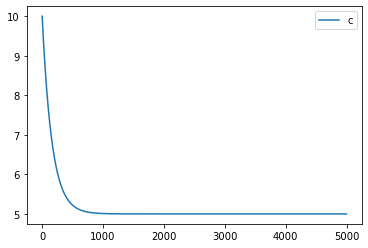

In [2]:
import numpy as np # computing
from scipy.integrate import odeint # ordinary differential equations
import matplotlib.pyplot as plt # plots
import seaborn as sns # plots

# - - - - - - - - - - - - - - - - - - - - - - - - - 

# define parameters: volumes, flow rates, steady inflow concentration
q_in = q_out = 0.5 # L/hr
c_in = 5 # umol/L
v = 80 # L

# - - - - - - - - - - - - - - - - - - - - - - - - - 

# define differential equation c' = f(c)
def sys_one(c, t): # (could depend on time, but doesn't here )
    return (q_in * c_in - q_out * c) / v # compute c' = f(c)

# - - - - - - - - - - - - - - - - - - - - - - - - - 

# set initial condition: concentration at t = 0
c_0 = 10 # umol/L

# time interval: array of integers from 0 to 5000
t = np.arange(5000) # hr

# - - - - - - - - - - - - - - - - - - - - - - - - - 

# solve initial value problem
sol_one = odeint(sys_one, c_0, t)

# - - - - - - - - - - - - - - - - - - - - - - - - - 

# plot solution
sns.lineplot(data=sol_one)
plt.legend(labels="c")

Experiment with adjusting parameters, initial conditions and time intervals! In particular, make sure you understand what conditions lead to increasing vs. decreasing concentration. If the system's behavior doesn't match your expectations, be sure to discuss and ask questions before proceeding. And when you've finished experimenting, reset $t$ to 5000 hrs.